## Scenario
    1) Delivery_time -> Predict delivery time using sorting time
    2) Salary_hike -> Build a prediction model for Salary_hike

    ------------------------------------------------------------

    Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Q1

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [215]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [216]:
df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)

In [217]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [218]:
# Checking the null values in the dataset
df.isna().sum()  # As we can see there are no null values which means our data is clean

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [219]:
df.dtypes          #Checking data types of the data frame

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [221]:
df.describe()
# Here we can interpret that there is little variation in mean and median of Delivery time, where mean is less than median which shows little negative
# skewness in the data where as in sorting time we can see mean and median are almost same which shows symmetry in the data

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

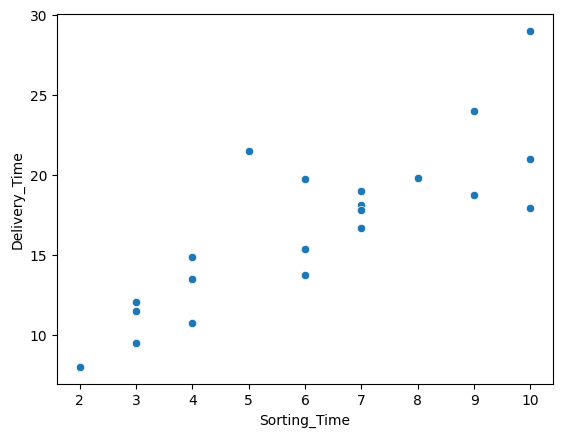

In [222]:
sns.scatterplot(x=df['Sorting_Time'],y=df['Delivery_Time'],data=df)
# Here we can see positive correlation between Delivery time and Sorting time, where
# we can interpret that with increase in delivery time, sorting time also increase

In [223]:
df.corr()      # Here we can see both columns are highly correlated with 0.82 correlation

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Delivery_Time', ylabel='Density'>

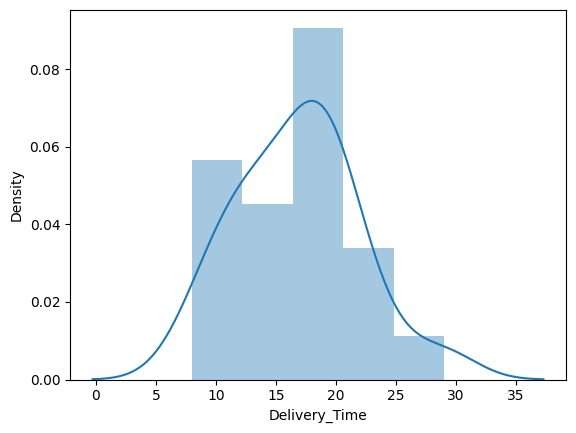

In [224]:
import warnings
warnings.filterwarnings('ignore')


sns.distplot(df['Delivery_Time'])   #Here we can see the density plot

<Axes: xlabel='Sorting_Time', ylabel='Density'>

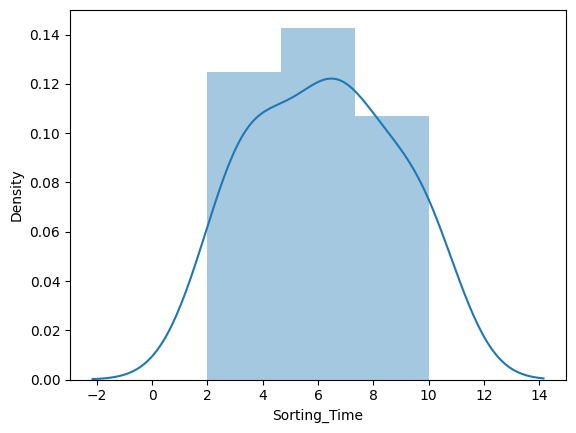

In [225]:
sns.distplot(df['Sorting_Time'])

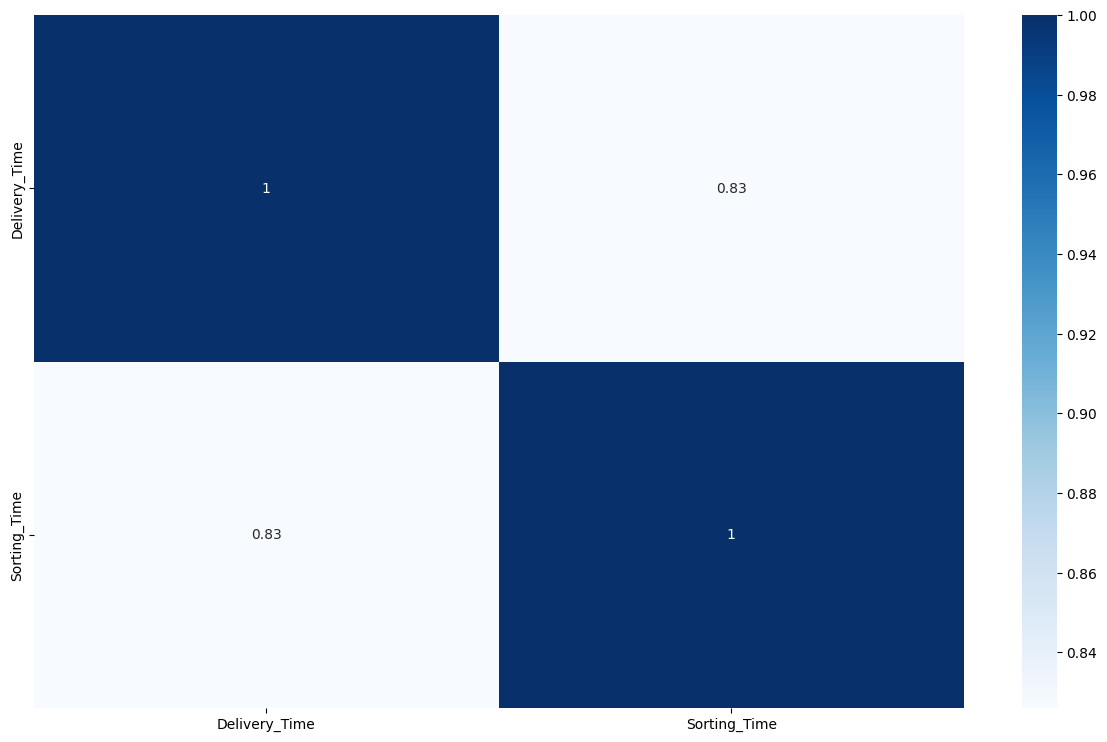

In [226]:
corr_matrx = df.corr()              #Correation analysis using heat map

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrx,annot=True,cmap='Blues')
plt.show()

### Model fitting

In [14]:
import statsmodels.formula.api as smf

model = smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        09:38:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

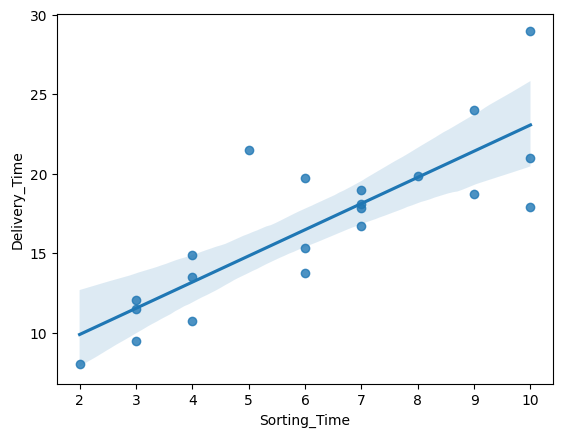

In [15]:
# To see best fit line, using regression plot
sns.regplot(x=df.Sorting_Time,y=df.Delivery_Time)

In [16]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [17]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [18]:
df['Predicted_Delivery_Time'] = model.fittedvalues

In [19]:
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [20]:
df['Error'] = model.resid           # Gives error values by subtracting Predicted_Delivery_Time - Delivery_Time
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [21]:
df['Error_Sq'] = (df['Error'])**2

In [22]:
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [23]:
mean_squared_error = df['Error_Sq'].mean()
mean_squared_error

7.793311548584062

In [38]:
print(model.rsquared)
print(model.rsquared_adj)

0.6822714748417231
0.6655489208860244


In [25]:
# Here, our model is giving 68%  accuracy with mean square error of 7.793

In [26]:
# Prediction on new datasets

In [27]:
newdata = pd.DataFrame({'Sorting_Time':[4,6,1,8,2]})
newdata

,Sorting_Time
0,4
1,6
2,1
3,8
4,2


In [28]:
newdata['Predicted'] = model.predict(newdata)
newdata

,Sorting_Time,Predicted
0,4,13.178814
1,6,16.476853
2,1,8.231754
3,8,19.774893
4,2,9.880774


### Applying log and square root transformation

#### Log Transformation

In [30]:
df['log_delivery_time'] = np.log(df['Delivery_Time'])
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error,Error_Sq,log_delivery_time
0,21.00,10,23.072933,-2.072933,4.297051,3.044522
1,13.50,4,13.178814,0.321186,0.103161,2.602690
2,19.75,6,16.476853,3.273147,10.713489,2.983153
3,24.00,9,21.423913,2.576087,6.636224,3.178054
4,29.00,10,23.072933,5.927067,35.130124,3.367296
5,15.35,6,16.476853,-1.126853,1.269798,2.731115
6,19.00,7,18.125873,0.874127,0.764098,2.944439
7,9.50,3,11.529794,-2.029794,4.120062,2.251292
8,17.90,10,23.072933,-5.172933,26.759235,2.884801
9,18.75,9,21.423913,-2.673913,7.149811,2.931194


In [31]:
model_log = smf.ols('log_delivery_time~Sorting_Time',data=df).fit()

In [32]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.59e-06
Time:                        09:27:29   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df['log_delivery_time_predicted'] = np.exp(model_log.fittedvalues)
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error,Error_Sq,log_delivery_time,log_delivery_time_predicted
0,21.00,10,23.072933,-2.072933,4.297051,3.044522,23.972032
1,13.50,4,13.178814,0.321186,0.103161,2.602690,12.725123
2,19.75,6,16.476853,3.273147,10.713489,2.983153,15.716034
3,24.00,9,21.423913,2.576087,6.636224,3.178054,21.570707
4,29.00,10,23.072933,5.927067,35.130124,3.367296,23.972032
5,15.35,6,16.476853,-1.126853,1.269798,2.731115,15.716034
6,19.00,7,18.125873,0.874127,0.764098,2.944439,17.465597
7,9.50,3,11.529794,-2.029794,4.120062,2.251292,11.450423
8,17.90,10,23.072933,-5.172933,26.759235,2.884801,23.972032
9,18.75,9,21.423913,-2.673913,7.149811,2.931194,21.570707


In [37]:
print(model_log.rsquared)
print(model_log.rsquared_adj)

0.7109478980584187
0.6957346295351776


In [ ]:
# While applying log transformation we can see change in adjusted accuracy is almost 3%

In [41]:
mse_log = ((df['Delivery_Time']-df['log_delivery_time_predicted'])**2).mean()
mse_log

8.645071962232093

In [87]:
rmse_log = np.sqrt(mse_log)
rmse_log

2.9402503230562007

#### Square root tranformation


In [42]:
df['sqrt_delivery_time'] = np.sqrt(df['Delivery_Time'])
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error,Error_Sq,log_delivery_time,log_delivery_time_predicted,sqrt_delivery_time
0,21.00,10,23.072933,-2.072933,4.297051,3.044522,23.972032,4.582576
1,13.50,4,13.178814,0.321186,0.103161,2.602690,12.725123,3.674235
2,19.75,6,16.476853,3.273147,10.713489,2.983153,15.716034,4.444097
3,24.00,9,21.423913,2.576087,6.636224,3.178054,21.570707,4.898979
4,29.00,10,23.072933,5.927067,35.130124,3.367296,23.972032,5.385165
5,15.35,6,16.476853,-1.126853,1.269798,2.731115,15.716034,3.917908
6,19.00,7,18.125873,0.874127,0.764098,2.944439,17.465597,4.358899
7,9.50,3,11.529794,-2.029794,4.120062,2.251292,11.450423,3.082207
8,17.90,10,23.072933,-5.172933,26.759235,2.884801,23.972032,4.230839
9,18.75,9,21.423913,-2.673913,7.149811,2.931194,21.570707,4.330127


In [43]:
model_sqrt = smf.ols('sqrt_delivery_time~Sorting_Time',data=df).fit()

In [44]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.00e-06
Time:                        09:47:03   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
df['sqrt_delivery_time_predicted'] = (model_sqrt.fittedvalues)**2
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,Error,Error_Sq,log_delivery_time,log_delivery_time_predicted,sqrt_delivery_time,sqrt_delivery_time_predicted
0,21.00,10,23.072933,-2.072933,4.297051,3.044522,23.972032,4.582576,23.416397
1,13.50,4,13.178814,0.321186,0.103161,2.602690,12.725123,3.674235,12.954660
2,19.75,6,16.476853,3.273147,10.713489,2.983153,15.716034,4.444097,16.100332
3,24.00,9,21.423913,2.576087,6.636224,3.178054,21.570707,4.898979,21.459291
4,29.00,10,23.072933,5.927067,35.130124,3.367296,23.972032,5.385165,23.416397
5,15.35,6,16.476853,-1.126853,1.269798,2.731115,15.716034,3.917908,16.100332
6,19.00,7,18.125873,0.874127,0.764098,2.944439,17.465597,4.358899,17.801258
7,9.50,3,11.529794,-2.029794,4.120062,2.251292,11.450423,3.082207,11.509915
8,17.90,10,23.072933,-5.172933,26.759235,2.884801,23.972032,4.230839,23.416397
9,18.75,9,21.423913,-2.673913,7.149811,2.931194,21.570707,4.330127,21.459291


In [47]:
print(model_sqrt.rsquared)
print(model_sqrt.rsquared_adj)

0.704049871541756
0.6884735489913221


In [ ]:
# Here we can see 2% increase in accuracy while appylying square root tranformation which can be observed from summary above as well

In [46]:
mse_sqrt = ((df['Delivery_Time']-df['sqrt_delivery_time_predicted'])**2).mean()
mse_sqrt

8.119576114622397

In [88]:
rmse_sqrt = np.sqrt(mse_sqrt)
rmse_sqrt

2.849486991481519

## Q2

In [48]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [154]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [155]:
df.isna().sum()      # Here, we can see our dataset contains no null values, which means our data is cleaned

YearsExperience    0
Salary             0
dtype: int64

In [156]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [157]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [159]:
df.shape

(30, 2)

In [160]:
df.describe()        # We can see variation in the mean where in both the cases it shows positive skewness of the data, cause mean is greater than the median in both cases

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='YearsExperience', ylabel='Density'>

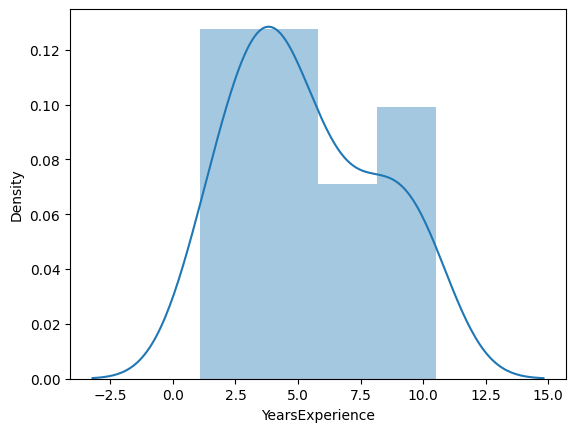

In [161]:
sns.distplot(df.YearsExperience)

<Axes: xlabel='Salary', ylabel='Density'>

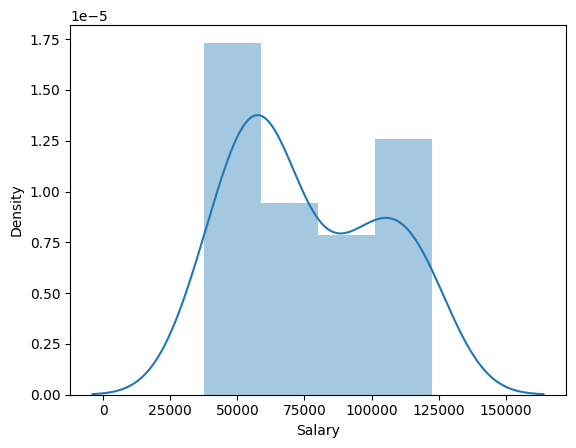

In [162]:
sns.distplot(df.Salary)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

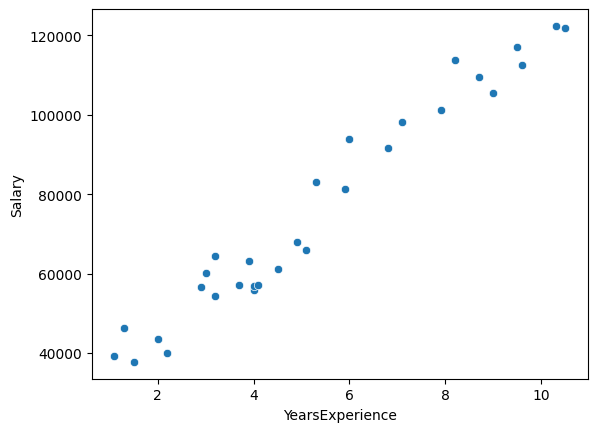

In [163]:
sns.scatterplot(x=df.YearsExperience,y=df.Salary)            # Here we can see the positive correlation

In [164]:
df.corr()            # Here the correction is 0.97 which means highly correlated

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


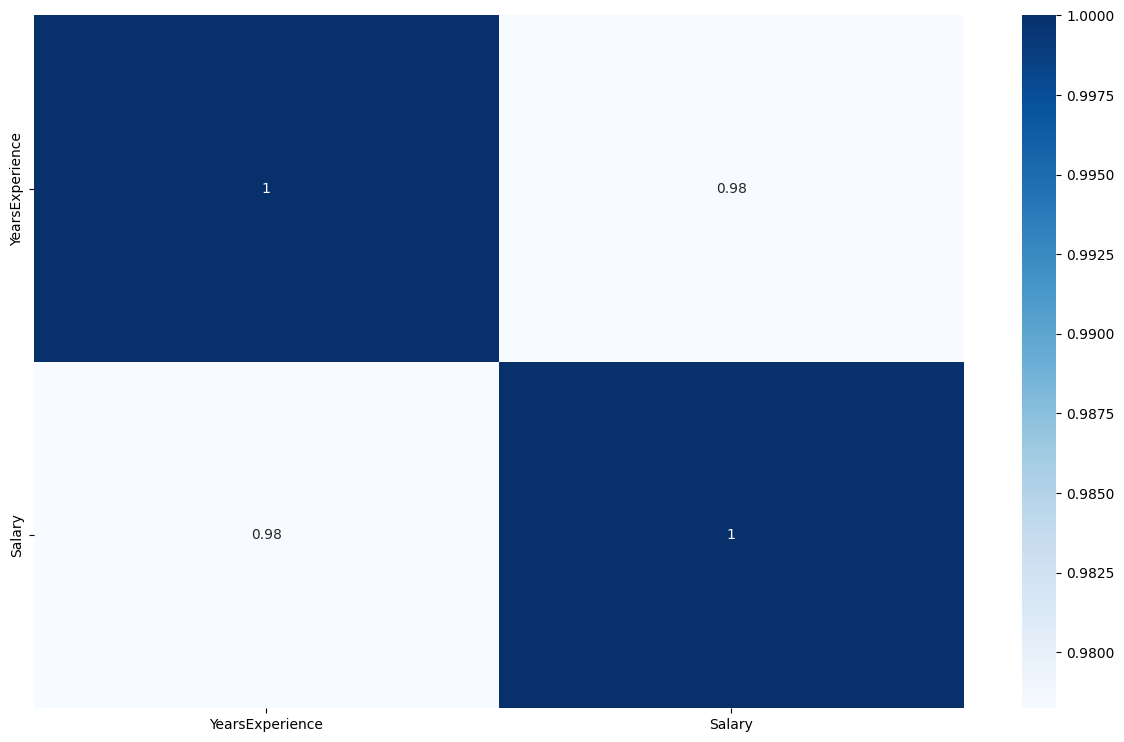

In [165]:
corr_matrix = df.corr()                     #Heat map for correlation analysis

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.show()                         #Here dark blue shows high correlation

### Model fitting

In [166]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data=df).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        13:30:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [169]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [170]:
df['Predicted_Salary'] = model.fittedvalues
df

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [171]:
df['Error'] = model.resid
df

,YearsExperience,Salary,Predicted_Salary,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


In [172]:
df['Error_Sq'] = (df['Error'])**2
df

,YearsExperience,Salary,Predicted_Salary,Error,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07


In [173]:
mean_squared_error = df['Error_Sq'].mean()
mean_squared_error

31270951.72228097

In [174]:
import numpy as np
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

5592.043608760662

In [175]:
r_squared = model.rsquared
r_squared

0.9569566641435086

In [176]:
# Here the accuracy of our model is 95%

In [177]:
# Now predicting on some dummy data or new data

newdata = pd.DataFrame({'YearsExperience':[5,3,2.5,1,0.5]})
newdata

,YearsExperience
0,5.0
1,3.0
2,2.5
3,1.0
4,0.5


In [178]:
# Model Prediction on new datasets

newdata['Predicted'] = model.predict(newdata)
newdata

,YearsExperience,Predicted
0,5.0,73042.011806
1,3.0,54142.087163
2,2.5,49417.106002
3,1.0,35242.162520
4,0.5,30517.181359


### Applying log and sqrt transformation

#### Log transformation

In [179]:
df['log_salary'] = np.log(df['Salary'])
df

,YearsExperience,Salary,Predicted_Salary,Error,Error_Sq,log_salary
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,10.580073
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,10.740843
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,10.538237
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06,10.681091
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07,10.593906
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07,10.944506
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07,11.004597
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06,10.904946
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07,11.073567
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07,10.954117


In [180]:
model_log = smf.ols('log_salary~YearsExperience',data=df).fit()

In [181]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           7.03e-18
Time:                        13:30:40   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
df['log_delivery_time_predicted'] = np.exp(model_log.fittedvalues)
df

,YearsExperience,Salary,Predicted_Salary,Error,Error_Sq,log_salary,log_delivery_time_predicted
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,10.580073,41998.957468
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,10.740843,43066.066794
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,10.538237,44160.289228
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06,10.681091,47019.029189
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07,10.593906,48213.688474
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07,10.944506,52639.142472
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07,11.004597,53303.675386
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06,10.904946,54658.014935
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07,11.073567,54658.014935
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07,10.954117,58196.330788


In [183]:
print(model_log.rsquared)
print(model_log.rsquared_adj)

0.9319671194084196
0.929537373673006


In [184]:
mse = ((df['Salary']-df['log_delivery_time_predicted'])**2).mean()
mse

52030760.27058356

In [185]:
rmse_log = np.sqrt(mse)
rmse_log

7213.235076620168

In [186]:
# Here in log transformation we can see accuracy in decreased by 3% and mse value is also increased higher

#### Square root transformation

In [187]:
df['sqrt_salary'] = np.sqrt(df['Salary'])
df

,YearsExperience,Salary,Predicted_Salary,Error,Error_Sq,log_salary,log_delivery_time_predicted,sqrt_salary
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,10.580073,41998.957468,198.350700
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,10.740843,43066.066794,214.953483
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,10.538237,44160.289228,194.244691
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06,10.681091,47019.029189,208.626460
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07,10.593906,48213.688474,199.727314
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07,10.944506,52639.142472,237.995798
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07,11.004597,53303.675386,245.254969
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06,10.904946,54658.014935,233.334524
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07,11.073567,54658.014935,253.860198
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07,10.954117,58196.330788,239.142217


In [188]:
model_sqrt = smf.ols('sqrt_salary~YearsExperience',data=df).fit()

In [189]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           9.78e-20
Time:                        13:30:45   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
df['sqrt_salary_predicted'] = (model_sqrt.fittedvalues)**2
df

,YearsExperience,Salary,Predicted_Salary,Error,Error_Sq,log_salary,log_delivery_time_predicted,sqrt_salary,sqrt_salary_predicted
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,10.580073,41998.957468,198.350700,39785.251671
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,10.740843,43066.066794,214.953483,41157.743455
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,10.538237,44160.289228,194.244691,42553.509262
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06,10.681091,47019.029189,208.626460,46144.747630
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07,10.593906,48213.688474,199.727314,47621.972517
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07,10.944506,52639.142472,237.995798,52975.542551
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07,11.004597,53303.675386,245.254969,53763.612294
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06,10.904946,54658.014935,233.334524,55357.207295
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07,11.073567,54658.014935,253.860198,55357.207295
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07,10.954117,58196.330788,239.142217,59443.018648


In [191]:
# Here we can see Square root transformation is working better than the log transformation

In [192]:
print(model_sqrt.rsquared)
print(model_sqrt.rsquared_adj)

0.9498353533865289
0.9480437588646192


In [193]:
mse = ((df['Salary']-df['sqrt_salary_predicted'])**2).mean()
mse

35117578.71376812

In [194]:
rmse_sqrt = np.sqrt(mse)
rmse_sqrt

5926.008666359518

#### Z transformation (Standardizaion)

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_tran = df[['Salary']]

z_score_transform = sc.fit_transform(col_to_tran)
df['z-score_transfmd'] = z_score_transform
print(df.head())


   YearsExperience   Salary  Predicted_Salary        Error      Error_Sq  \
0              1.1  39343.0      36187.158752  3155.841248  9.959334e+06   
1              1.3  46205.0      38077.151217  8127.848783  6.606193e+07   
2              1.5  37731.0      39967.143681 -2236.143681  5.000339e+06   
3              2.0  43525.0      44692.124842 -1167.124842  1.362180e+06   
4              2.2  39891.0      46582.117306 -6691.117306  4.477105e+07   

   log_salary  log_delivery_time_predicted  sqrt_salary  \
0   10.580073                 41998.957468   198.350700   
1   10.740843                 43066.066794   214.953483   
2   10.538237                 44160.289228   194.244691   
3   10.681091                 47019.029189   208.626460   
4   10.593906                 48213.688474   199.727314   

   sqrt_salary_predicted  z-score_transfmd  
0           39785.251671         -1.360113  
1           41157.743455         -1.105527  
2           42553.509262         -1.419919  
3       

In [203]:
df.rename({'z-score_transfmd':'z_score_transfmd'},axis=1,inplace=True)

In [205]:
model = smf.ols('z_score_transfmd~YearsExperience',data=df).fit()

In [206]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       z_score_transfmd   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        13:51:54   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8629      0.084    -22.090      0.000      -2.036      -1.690
YearsExperience     0.3506      0.014     24.950      0.000       0.322       0.379
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


In [210]:
df['z_score_tran_predicted'] = model.fittedvalues

In [211]:
mse_z = ((df['Salary']-df['z_score_tran_predicted'])**2).mean()
mse_z

6502903684.739832

In [214]:
rmse_z = np.sqrt(mse_z)
rmse_z

80640.58336061212

      By Anzil Rafeeq     